In [ ]:
!pip install tabulate


Saving hotel_bookings.csv to hotel_bookings.csv
Logistic Regression:
Accuracy: 0.9318, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN:
Accuracy: 0.9773, Precision: 1.0000, Recall: 0.5000, F1-Score: 0.6667

Random Forest:
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Logistic Regression (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Random Forest (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

📊 Model Performance Comparison

+---------------------+----------------------------+---------------------------+
| Model               |   Accuracy (Before Tuning) |   Accuracy (After Tuning) |
+=====================+============================+===========================+
| Logistic Regression |                      93.18 |                     95.45 |
+---------------------+----------------------------+------------

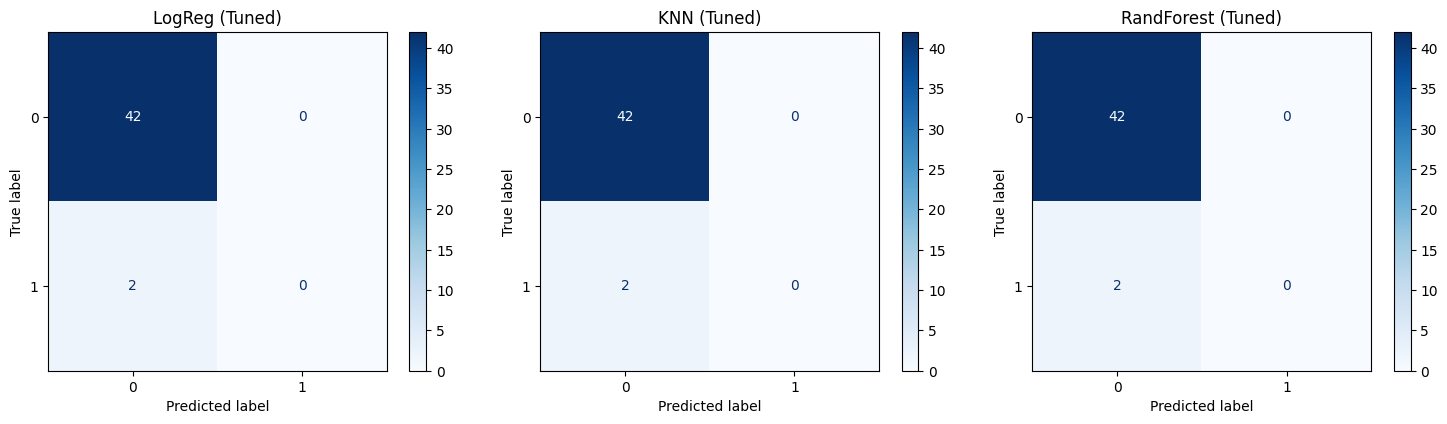


🏆 Final Recommendation:
The best performing model after tuning is **Logistic Regression (Tuned)** with accuracy of 95.45%.


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from tabulate import tabulate

# Step 2: Load Dataset
uploaded = files.upload()
df = pd.read_csv("hotel_bookings.csv")
df.dropna(inplace=True)

# Target & Features
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)

# Step 3: Preprocessing
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"{name}:\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}\n")
    return [name, acc, prec, rec, f1], y_pred

# Step 6: Build pipelines
lr_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))])
knn_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())])
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))])

# Step 7: Evaluate before tuning
results = []
res, _ = evaluate_model("Logistic Regression", lr_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("KNN", knn_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test); results.append(res)

# Step 8: Hyperparameter tuning
lr_params = {"classifier__C": [0.01, 0.1, 1, 10]}
knn_params = {"classifier__n_neighbors": [3, 5, 7, 11]}
rf_params = {"classifier__n_estimators": [50, 100], "classifier__max_depth": [10, 20, None]}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=3, scoring="accuracy")
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=3, scoring="accuracy")
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring="accuracy")

lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Step 9: Evaluate after tuning
tuned_results = []
res, pred_lr = evaluate_model("Logistic Regression (Tuned)", lr_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_knn = evaluate_model("KNN (Tuned)", knn_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_rf = evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)

# Step 10: Model Comparison Table
before_tune = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
after_tune = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy (Before Tuning)": (before_tune["Accuracy"] * 100).round(2),
    "Accuracy (After Tuning)": (after_tune["Accuracy"] * 100).round(2)
})

print("📊 Model Performance Comparison\n")
print(tabulate(comparison, headers='keys', tablefmt='grid', showindex=False))

# Step 11: Confusion Matrices
print("\n🧩 Confusion Matrices:")
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, (pred, name) in enumerate(zip([pred_lr, pred_knn, pred_rf], ['LogReg', 'KNN', 'RandForest'])):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=axs[i], cmap='Blues')
    axs[i].set_title(f"{name} (Tuned)")
plt.tight_layout()
plt.show()

# Step 12: Final Recommendation
best_model_index = after_tune["Accuracy"].idxmax()
best_model = after_tune.loc[best_model_index]
print("\n🏆 Final Recommendation:")
print(f"The best performing model after tuning is **{best_model['Model']}** with accuracy of {best_model['Accuracy'] * 100:.2f}%.")


Saving hotel_bookings.csv to hotel_bookings (1).csv
Logistic Regression:
Accuracy: 0.9318, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN:
Accuracy: 0.9773, Precision: 1.0000, Recall: 0.5000, F1-Score: 0.6667

Random Forest:
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Logistic Regression (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Random Forest (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

📊 Model Performance Comparison & Conclusion

+---------------------+--------------------------+-------------------------+-----------------------------------+
| Model               |   Accuracy Before Tuning |   Accuracy After Tuning | Conclusion                        |
+=====================+==========================+=========================+===================================+
| Logistic Regression |         

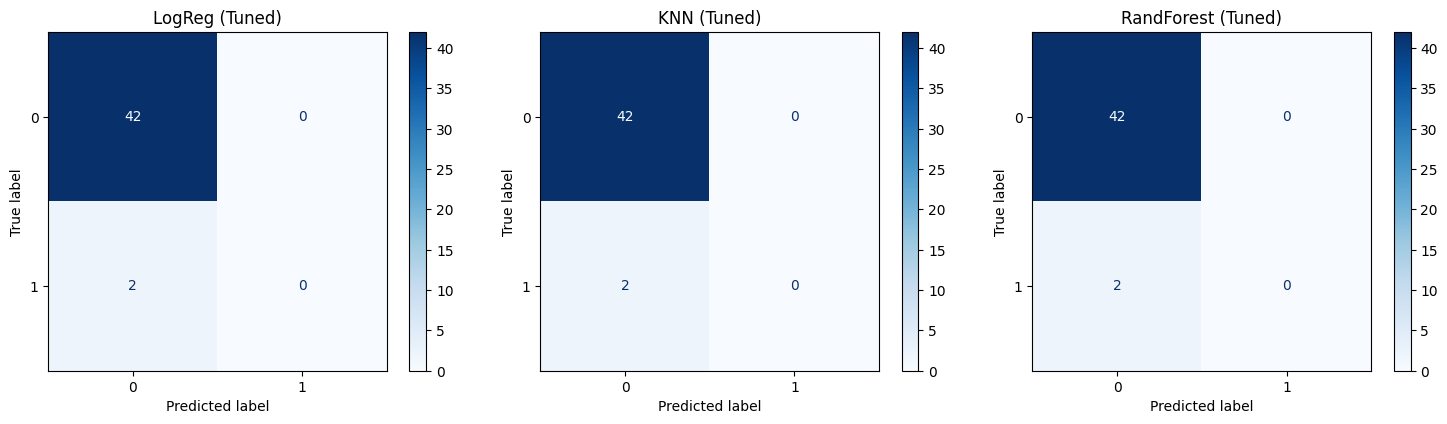


🏆 Final Recommendation:
The best performing model after tuning is **Logistic Regression (Tuned)** with accuracy of 95.45%.


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from tabulate import tabulate

# Step 2: Load Dataset
uploaded = files.upload()
df = pd.read_csv("hotel_bookings.csv")
df.dropna(inplace=True)

# Target & Features
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)

# Step 3: Preprocessing
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"{name}:\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}\n")
    return [name, acc, prec, rec, f1], y_pred

# Step 6: Build pipelines
lr_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))])
knn_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())])
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))])

# Step 7: Evaluate before tuning
results = []
res, _ = evaluate_model("Logistic Regression", lr_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("KNN", knn_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test); results.append(res)

# Step 8: Hyperparameter tuning
lr_params = {"classifier__C": [0.01, 0.1, 1, 10]}
knn_params = {"classifier__n_neighbors": [3, 5, 7, 11]}
rf_params = {"classifier__n_estimators": [50, 100], "classifier__max_depth": [10, 20, None]}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=3, scoring="accuracy")
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=3, scoring="accuracy")
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring="accuracy")

lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Step 9: Evaluate after tuning
tuned_results = []
res, pred_lr = evaluate_model("Logistic Regression (Tuned)", lr_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_knn = evaluate_model("KNN (Tuned)", knn_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_rf = evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)

# Step 10: Model Comparison Table
before_tune = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
after_tune = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy Before Tuning": (before_tune["Accuracy"] * 100).round(2),
    "Accuracy After Tuning": (after_tune["Accuracy"] * 100).round(2)
})

# Step 11: Add conclusion column
def generate_conclusion(before, after):
    if after > before:
        return "🔼 Performed better after tuning."
    elif after < before:
        return "🔽 Did not improve after tuning."
    else:
        return "🔽 No improvement after tuning."

comparison["Conclusion"] = [
    generate_conclusion(row["Accuracy Before Tuning"], row["Accuracy After Tuning"])
    for _, row in comparison.iterrows()
]

print("📊 Model Performance Comparison & Conclusion\n")
print(tabulate(comparison, headers='keys', tablefmt='grid', showindex=False))

# Step 12: Confusion Matrices
print("\n🧩 Confusion Matrices:")
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, (pred, name) in enumerate(zip([pred_lr, pred_knn, pred_rf], ['LogReg', 'KNN', 'RandForest'])):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=axs[i], cmap='Blues')
    axs[i].set_title(f"{name} (Tuned)")
plt.tight_layout()
plt.show()

# Step 13: Final Recommendation
best_model_index = after_tune["Accuracy"].idxmax()
best_model = after_tune.loc[best_model_index]
print("\n🏆 Final Recommendation:")
print(f"The best performing model after tuning is **{best_model['Model']}** with accuracy of {best_model['Accuracy'] * 100:.2f}%.")


Saving hotel_bookings.csv to hotel_bookings (3).csv
Logistic Regression:
Accuracy: 0.9318, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN:
Accuracy: 0.9773, Precision: 1.0000, Recall: 0.5000, F1-Score: 0.6667

Random Forest:
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Logistic Regression (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

KNN (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Random Forest (Tuned):
Accuracy: 0.9545, Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

📊 Model Performance Comparison & Conclusion

+---------------------+--------------------------+-------------------------+-----------------------------------+
| Model               |   Accuracy Before Tuning |   Accuracy After Tuning | Conclusion                        |
+=====================+==========================+=========================+===================================+
| Logistic Regression |         

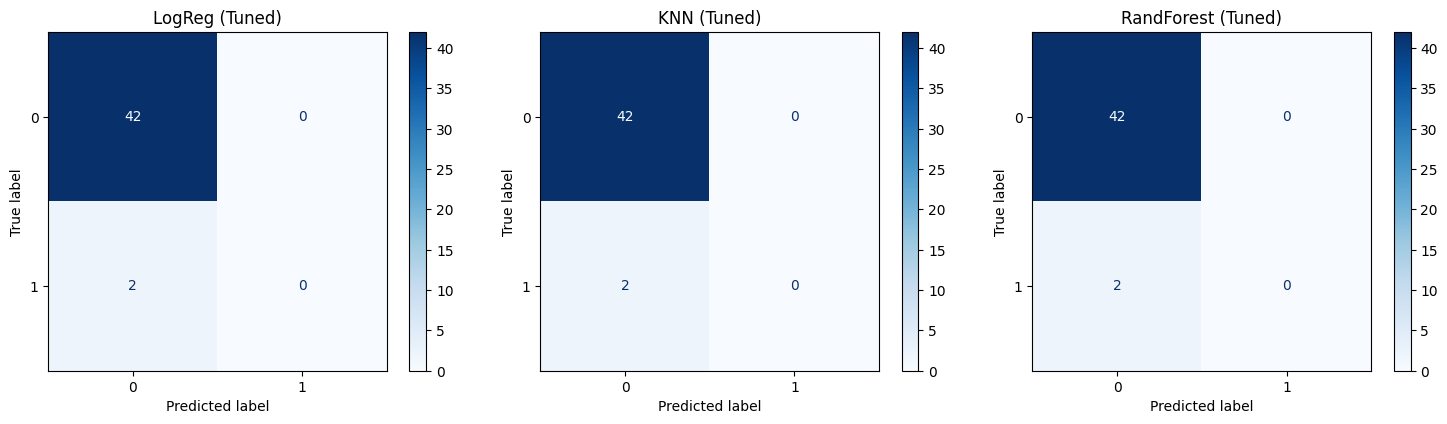


🏆 Final Recommendation:
The best performing model after tuning is **Logistic Regression (Tuned)** with accuracy of 95.45%.


['preprocessor.pkl']

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from tabulate import tabulate
import joblib  # For saving/loading models

# Step 2: Load Dataset
uploaded = files.upload()
df = pd.read_csv("hotel_bookings.csv")
df.dropna(inplace=True)

# Target & Features
y = df['is_canceled']
X = df.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)

# Step 3: Preprocessing
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Evaluation Function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"{name}:\nAccuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}\n")
    return [name, acc, prec, rec, f1], y_pred

# Step 6: Build pipelines
lr_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression(max_iter=1000))])
knn_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())])
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))])

# Step 7: Evaluate before tuning
results = []
res, _ = evaluate_model("Logistic Regression", lr_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("KNN", knn_pipeline, X_train, X_test, y_train, y_test); results.append(res)
res, _ = evaluate_model("Random Forest", rf_pipeline, X_train, X_test, y_train, y_test); results.append(res)

# Step 8: Hyperparameter tuning
lr_params = {"classifier__C": [0.01, 0.1, 1, 10]}
knn_params = {"classifier__n_neighbors": [3, 5, 7, 11]}
rf_params = {"classifier__n_estimators": [50, 100], "classifier__max_depth": [10, 20, None]}

lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=3, scoring="accuracy")
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=3, scoring="accuracy")
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring="accuracy")

lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Step 9: Evaluate after tuning
tuned_results = []
res, pred_lr = evaluate_model("Logistic Regression (Tuned)", lr_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_knn = evaluate_model("KNN (Tuned)", knn_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)
res, pred_rf = evaluate_model("Random Forest (Tuned)", rf_grid.best_estimator_, X_train, X_test, y_train, y_test); tuned_results.append(res)

# Step 10: Model Comparison Table
before_tune = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
after_tune = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Random Forest"],
    "Accuracy Before Tuning": (before_tune["Accuracy"] * 100).round(2),
    "Accuracy After Tuning": (after_tune["Accuracy"] * 100).round(2)
})

# Step 11: Add conclusion column
def generate_conclusion(before, after):
    if after > before:
        return "🔼 Performed better after tuning."
    elif after < before:
        return "🔽 Did not improve after tuning."
    else:
        return "🔽 No improvement after tuning."

comparison["Conclusion"] = [
    generate_conclusion(row["Accuracy Before Tuning"], row["Accuracy After Tuning"])
    for _, row in comparison.iterrows()
]

print("📊 Model Performance Comparison & Conclusion\n")
print(tabulate(comparison, headers='keys', tablefmt='grid', showindex=False))

# Step 12: Confusion Matrices
print("\n🧩 Confusion Matrices:")
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, (pred, name) in enumerate(zip([pred_lr, pred_knn, pred_rf], ['LogReg', 'KNN', 'RandForest'])):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=axs[i], cmap='Blues')
    axs[i].set_title(f"{name} (Tuned)")
plt.tight_layout()
plt.show()

# Step 13: Final Recommendation
best_model_index = after_tune["Accuracy"].idxmax()
best_model = after_tune.loc[best_model_index]
print("\n🏆 Final Recommendation:")
print(f"The best performing model after tuning is **{best_model['Model']}** with accuracy of {best_model['Accuracy'] * 100:.2f}%.")


# Save the model and preprocessor
joblib.dump(rf_grid.best_estimator_, 'rf_best_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')